# Script to generate dummy snow data for visualization

February 2024

*Beatrice Marti, hydrosolutions GmbH*

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime as dt

/var/folders/fx/fhbs7qgd6998fvtd5n8bs1lr0000gn/T/ipykernel_43256/3336386082.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The data to be generated will have 365 rows, one for each day of the year. The columns will be:
- `date`: the date (of the current year)
- `Q5_SWE`: 5th percentile of the snow water equivalent (SWE) for the current day
- `Q50_SWE`: median of the SWE for the current day
- `Q95_SWE`: 95th percentile of the SWE for the current day
- `Q5_HS`: 5th percentile of the snow depth (HS) for the current day
- `Q50_HS`: median of the HS for the current day
- `Q95_HS`: 95th percentile of the HS for the current day 

We'll generate files for each code in the `CODE` column of the `basins` layer of the CA-discharge data set and one file for each `REGION` in the `basins` layer of the CA-discharge data set. The files will be saved in the `data` folder with the naming convention `<CODE>_current.txt` and `<REGION>_current.txt`, respectively. 
Another set of data will be stored in the files `<CODE>_climate.txt` and `<REGION>_climate.txt`. These files will contain the same columns as the current data, but the values represent averages over the years 2000-2023.

In [39]:
# Read in the basins layer
basins=gpd.read_file('../www/CA-discharge_basins_plus.gpkg')

# Get unique codes from the basins layer
codes=basins['CODE'].unique()
regions=basins['REGION'].unique()

# One water year has 365 days.
dates = pd.DataFrame(index=pd.date_range(start='09/01/2023', end='08/31/2024', freq='D'))
# Remove leap day
dates = dates[~((dates.index.month == 2) & (dates.index.day == 29))]
dates.index.name = 'date'
# In the current year data, we only have data until today.
# In the climate year data, we have data for the entire year.
today = dt.date.today()

# We use a sine wave to simulate an annual cycle of snow data.
frequency = 1 / 450
sine_values = np.sin(2 * np.pi * frequency * np.arange(0, 365))
# Set negative values to 0
sine_values[sine_values < 0] = 0

# For each region in regions, create a dataframe with daily dates of 2024 and
# random data between 0 and 500 for the columns `Q5_SWE`, `Q50_SWE`, `Q95_SWE`,
# `Q5_HS`, `Q50_HS`, and `Q95_HS`. Then, save the dataframe as a txt file in
# the `data` folder with the name `<region>_current.txt`.
for region in regions:
    # Generate random data for current
    data = dates.copy()
    for col in ['Q5_SWE', 'Q5_HS']:
        data[col] = sine_values * (4 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q50_SWE', 'Q50_HS']:
        data[col] = sine_values * (33 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q95_SWE', 'Q95_HS']:
        data[col] = sine_values * (65 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    # Set data from today +1 to the end of the year to NaN
    data.loc[today+dt.timedelta(days=1):, :] = np.nan
    data.to_csv(f'../data/{region}_current.txt', sep='\t', index=True, header=True)
    # Generate random data for climate
    data = dates.copy()
    for col in ['Q5_SWE', 'Q5_HS']:
        data[col] = sine_values * (10 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q50_SWE', 'Q50_HS']:
        data[col] = sine_values * (50 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q95_SWE', 'Q95_HS']:
        data[col] = sine_values * (90 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    data.to_csv(f'../data/{region}_climate.txt', sep='\t', index=True, header=True)
# Do the same for each code in codes
for code in codes:
    # Generate random data for current
    data = dates.copy()
    for col in ['Q5_SWE', 'Q5_HS']:
        data[col] = sine_values * (4 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q50_SWE', 'Q50_HS']:
        data[col] = sine_values * (33 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q95_SWE', 'Q95_HS']:
        data[col] = sine_values * (65 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    # Set data from today +1 to the end of the year to NaN
    data.loc[today+dt.timedelta(days=1):, :] = np.nan
    data.to_csv(f'../data/{code}_current.txt', sep='\t', index=True, header=True)
    # Generate random data for climate
    data = dates.copy()
    for col in ['Q5_SWE', 'Q5_HS']:
        data[col] = sine_values * (10 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q50_SWE', 'Q50_HS']:
        data[col] = sine_values * (50 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    for col in ['Q95_SWE', 'Q95_HS']:
        data[col] = sine_values * (90 + np.abs(np.random.normal(scale=2, size=(len(dates)))))
    data.to_csv(f'../data/{code}_climate.txt', sep='\t', index=True, header=True)


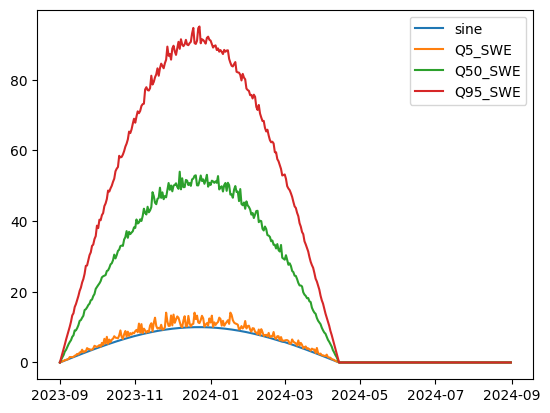

In [40]:
# Plot the data
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data.index, sine_values*10, label='sine')
ax.plot(data.index, data.Q5_SWE, label='Q5_SWE')
ax.plot(data.index, data.Q50_SWE, label='Q50_SWE')
ax.plot(data.index, data.Q95_SWE, label='Q95_SWE')
ax.legend()
plt.show()
